In [1]:
import pandas as pd

# Load the merged dataset
data_path = "/Users/willwu/Documents/GitHub/Zooplankton/plankton_data/Merged_Master_Subset.csv"  # Update path if necessary
df = pd.read_csv(data_path)

# Display dataset info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1531716, 14)


,Class,WaterT,AvgDepth,PRECIP,gdd2,DOY,SmeltDen,YPerchDen,BurbotDen,OtherFishDen,distshore,Aspect.Ratio,Circularity,Diameter..ABD.
0,Bosmina_1,13.4,8.30,0,140.374878,136,NaN,0.000000,0.0,0.0,469.236161,0.8512,0.7414,447.6502
1,Bosmina_1,16.1,4.45,0,140.374878,136,NaN,0.000000,0.0,0.0,337.080355,0.7627,0.4632,406.3137
2,Bosmina_1,11.8,4.60,0,194.031287,147,0.0,0.146546,0.0,0.0,93.538316,0.8719,0.8065,456.8796
3,Bosmina_1,11.3,2.90,40,131.462035,134,0.0,0.000000,0.0,0.0,116.085666,0.3099,0.2424,335.0322
4,Bosmina_1,7.7,3.40,0,107.485731,134,0.0,0.000000,0.0,0.0,42.636144,0.8985,0.6109,509.4362


In [6]:
# Selecting the most relevant features
selected_features = [
    "Class",          # Target Variable
    "WaterT",         # Environmental
    "AvgDepth",
    "PRECIP",
    "gdd2",
    "DOY",
    "SmeltDen",
    "YPerchDen", 
    "BurbotDen", 
    "OtherFishDen",
    "distshore",
    "Aspect.Ratio",   # Shape Features
    "Circularity",
    "Diameter..ABD."  # Size Feature (Chosen over Perimeter, Area)
]

df = df[selected_features]

# Display selected columns
print("Selected Features:", df.columns)
df.head()

# Show the count for each class
df["Class"].value_counts()



Selected Features: Index(['Class', 'WaterT', 'AvgDepth', 'PRECIP', 'gdd2', 'DOY', 'SmeltDen',
       'YPerchDen', 'BurbotDen', 'OtherFishDen', 'distshore', 'Aspect.Ratio',
       'Circularity', 'Diameter..ABD.'],
      dtype='object')


Class
Bosmina_1        300000
Calanoid_1       300000
Cyclopoid_1      300000
Herpacticoida    300000
Chironomid       218540
Daphnia           92624
Chydoridae        20552
Name: count, dtype: int64

Missing Values per Column:
 Class                  0
WaterT                 0
AvgDepth               0
PRECIP                 0
gdd2                   0
DOY                    0
SmeltDen          881819
YPerchDen            104
BurbotDen            104
OtherFishDen         104
distshore         232507
Aspect.Ratio           0
Circularity            0
Diameter..ABD.         0
dtype: int64
Percentage of Missing Values per Class:
                 SmeltDen  distshore
Class                              
Bosmina_1      39.783667   7.927333
Calanoid_1     78.861000  19.018667
Chironomid      3.102407   2.220189
Chydoridae     35.967302   9.420008
Cyclopoid_1    97.055333  17.914333
Daphnia        95.543272  26.882881
Herpacticoida  44.017000  22.079333


/var/folders/z1/m0zdhyss3_xcp1hpgzc17plh0000gn/T/ipykernel_43909/2411461998.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y='distshore', data=df, palette="Set2")


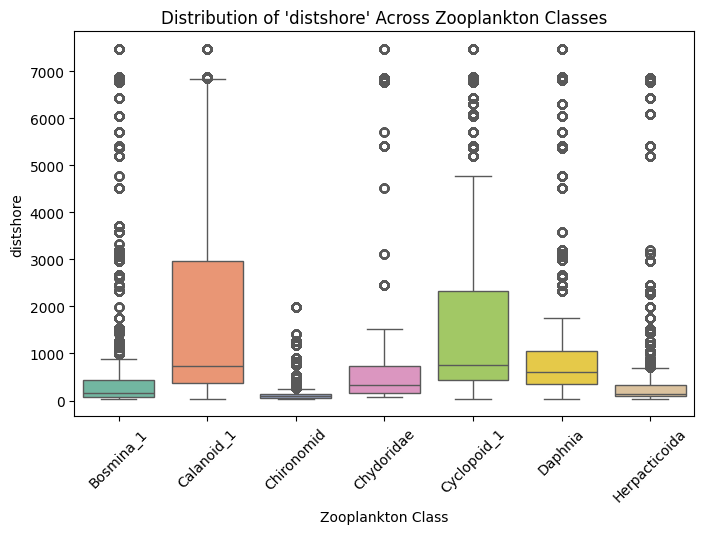

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check missing values in the dataset
print("Missing Values per Column:\n", df.isnull().sum())

df["Class"].value_counts()
# Calculate the percentage of missing values for 'SmeltDen' and 'distshore' for each class
missing_percentage = df.groupby('Class')[['SmeltDen', 'distshore']].apply(lambda x: x.isnull().mean() * 100)

print("Percentage of Missing Values per Class:\n", missing_percentage)
df['distshore'].describe()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Class", y='distshore', data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title(f"Distribution of 'distshore' Across Zooplankton Classes")
plt.xlabel("Zooplankton Class")
plt.ylabel('distshore')
plt.show()


In [4]:
#Predict Missing Values Using Regression
from sklearn.linear_model import LinearRegression

# Select only rows where distshore is NOT missing
df_not_missing = df.dropna(subset=["distshore"])

# Train a simple regression model
X_train = df_not_missing[["AvgDepth"]]
y_train = df_not_missing["distshore"]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict missing values
missing_rows = df[df["distshore"].isnull()]
df.loc[df["distshore"].isnull(), "distshore"] = regressor.predict(missing_rows[["AvgDepth"]])


In [11]:
# Check again to ensure there are no missing values
print("Missing values after imputation:", df["distshore"].isnull().sum())

Missing values after imputation: 0


In [5]:
from imblearn.over_sampling import SMOTE

# Splitting features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

df["Class"].value_counts()

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Class"] = y_resampled

print("Balanced Dataset Shape:", df_resampled.shape)
df_resampled["Class"].value_counts()


Balanced Dataset Shape: (226156476, 8)


Class
Calanoid_1       32308068
Herpacticoida    32308068
Cyclopoid_1      32308068
Chironomid       32308068
Bosmina_1        32308068
Chydoridae       32308068
Daphnia          32308068
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Class"]),
    df["Class"],
    test_size=0.2,
    stratify=df["Class"],
    random_state=42
)

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Complete!")


Data Preprocessing Complete!


In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score


# Compute scale_pos_weight for handling class imbalance
class_counts = y_train.value_counts()
min_class_count = class_counts.min()
scale_pos_weight = {cls: count / min_class_count for cls, count in class_counts.items()}

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    scale_pos_weight=scale_pos_weight,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score (Weighted):", f1_score(y_test, y_pred_xgb, average="weighted"))

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <54A1AE05-1E14-3DA2-A8D0-062134694298> /Users/willwu/Documents/GitHub/Zooplankton/plankton_env/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
